# Prepocessing and data selection 

In [1]:
from GG_mthesis import *
%matplotlib inline

In [2]:
# sns.set_style('whitegrid')
# sns.set_palette('colorblind')
# sns.set(font_scale=1.2)

## Reshaping

In [3]:
#define the path
path = '.\\data\\01_raw\\tsg_orchestra\\b1903933.nc'

#open the dataset with the defined path
ds_orig = xr.open_dataset(path) 

#Squeeze eliminates dimensions of length 0 and 1. Drop REFMAX as it is not needed. Swap MAXT (count) with TIME 
#to make TIME unique dimension (MAXT is a count a not needed, you can access the same with .isel). Rename coords to
#my standard.
ds = ds_orig.squeeze().drop_dims('REFMAX').swap_dims({'MAXT':'TIME'}).rename({
    'LONGITUDE':'lon','LATITUDE':'lat','TIME':'time','DEPTH':'depth'})

#Definition of new time attributes (datetime). Retrieved from original dataset and modified.
new_time_attr = {'long_name': 'Chronological DateTime Date',
 'standard_name': 'time',
 'ancillary_variables': 'TIME_SEADATANET_QC',
 'axis': 'T',
 'valid_min': 0.0,
 'valid_max': 2500000.0,
 'sdn_parameter_urn': 'SDN:P01::CJDY1101',
 'sdn_parameter_name': 'DateTime (chronological)',
 'sdn_uom_name': 'Days',
 'sdn_uom_urn': 'SDN:P06::UTAA'}

#Pull out the index (a CFTimeIndex) and use built in to_datetimeindex method.
datetimeindex = ds.indexes['time'].to_datetimeindex()

#Replace CFTimeIndex with DateTimeIndex:
ds['time'] = datetimeindex

#Attach new attributes
ds['time'].attrs = new_time_attr

C:\Users\gian_\AppData\Local\Temp/ipykernel_1320/4149106755.py:26: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = ds.indexes['time'].to_datetimeindex()


## Quality control and name standards

Method: I apply the count_flags function to the QC variables. If they are fine (only good values and interpolated values) drop
it from the dataset (the QC variable).

In [4]:
#Here I create a dataframe of each flag occurence for each variable. 
#Call the count_flags function for each QC variable.
position_QC = data.QC.count_flags(ds.POSITION_SEADATANET_QC)
depth_QC = data.QC.count_flags(ds.DEPTH_SEADATANET_QC)
time_QC = data.QC.count_flags(ds.TIME_SEADATANET_QC)
attenuation_QC = data.QC.count_flags(ds.ATTNDR01_SEADATANET_QC)
conduc_QC = data.QC.count_flags(ds.CNDCSG01_SEADATANET_QC)
cloro_QC = data.QC.count_flags(ds.CPHLUMTF_SEADATANET_QC)
PS_uncal_QC = data.QC.count_flags(ds.PSALSG01_SEADATANET_QC)
PS_cal_QC = data.QC.count_flags(ds.PSALSU01_SEADATANET_QC)
T_hull1_QC = data.QC.count_flags(ds.TEMPHU01_SEADATANET_QC)
T_hull2_QC = data.QC.count_flags(ds.TEMPHU02_SEADATANET_QC)
T_cond_QC = data.QC.count_flags(ds.TMESSG01_SEADATANET_QC)

#create an index
index = ['position_QC', 'depth_QC', 'time_QC', 'attenuation_QC', 'conduc_QC', 'cloro_QC', 'PS_uncal_QC', 'PS_cal_QC', 
         'T_hull1_QC', 'T_hull2_QC', 'T_cond_QC']

#Create a list with each QC variable count
QC =[position_QC, depth_QC, time_QC, attenuation_QC, conduc_QC, cloro_QC, PS_uncal_QC, PS_cal_QC, T_hull1_QC, 
    T_hull2_QC, T_cond_QC]

#Create the dataframe
QC_df = pd.DataFrame(QC, index=index)

In [5]:
QC_df

,no_quality_control,good_value,probably_good_value,probably_bad_value,bad_value,changed_value,value_below_detection,value_in_excess,interpolated_value,missing_value,value_phenomenon_uncertain
position_QC,0,41189,0,0,0,0,0,0,88,0,0
depth_QC,0,41277,0,0,0,0,0,0,0,0,0
time_QC,0,41277,0,0,0,0,0,0,0,0,0
attenuation_QC,0,25051,0,174,0,0,0,0,0,0,0
conduc_QC,0,29854,0,9838,0,0,0,0,0,0,0
cloro_QC,0,25218,0,7,0,0,0,0,0,0,0
PS_uncal_QC,0,25380,0,9,0,0,0,0,0,0,0
PS_cal_QC,0,25221,0,8,0,0,0,0,0,0,0
T_hull1_QC,0,25220,0,4,0,0,0,0,0,0,0
T_hull2_QC,0,25220,0,4,0,0,0,0,0,0,0


It can be seen that the problematic variable is the conductivity, and a few temperature and salinity values. Let's map them and
have a look where they are located. If they are out region of interest they are going to be thrown out anyways.

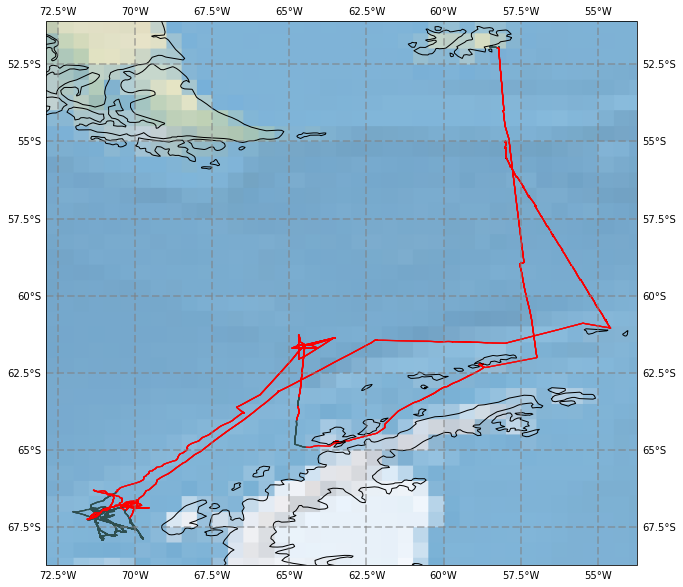

In [6]:
data.QC.cruise_map_QC(ds.CNDCSG01_SEADATANET_QC,
    ds.lon, 
    ds.lat,
    #savepath='C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\map_bad_values.png'
    ) 

The probably bad conductivity values are out of our region of interest. They are going to be disregarded anyways.

In [7]:
#data.QC.cruise_map_QC(ds.PSALSG01_SEADATANET_QC, ds.lon, ds.lat)

Same for the salinity, the bad values are not in out region of interest.

In [8]:
#data.QC.cruise_map_QC(ds.TEMPHU02_SEADATANET_QC, ds.lon, ds.lat)

Same for temperature

This means that we can drop all of the QC variables to reduce our dataset and make it more visual. They have been controlled, and in my region of interest there are not any conflicting values.

In [9]:
#Drop unnecessary variables to make dataset clearer. (Drop QC variables only if they are all good)

# ds = ds.drop(['SDN_CRUISE','crs','SDN_EDMO_CODE','SDN_STATION','SDN_LOCAL_CDI_ID','SDN_BOT_DEPTH','POSITION_SEADATANET_QC',
#               'DEPTH_SEADATANET_QC','TIME_SEADATANET_QC','ATTNDR01_SEADATANET_QC','CNDCSG01_SEADATANET_QC',
#               'CPHLUMTF_SEADATANET_QC','PSALSG01_SEADATANET_QC','PSALSU01_SEADATANET_QC','TEMPHU01_SEADATANET_QC',
#               'TEMPHU02_SEADATANET_QC','TMESSG01_SEADATANET_QC'])

#depth could theroetically also be dropped as it is constant, but it is not a big burden to stay and could be nice for future
#workflows.

#I also rename the variables to more mnemonic variable names (standarised names for this workflow)

In [10]:
ds = ds.rename({'ATTNDR01':'attenuation','CNDCSG01':'conductivity_tsg','CPHLUMTF':'chl-a','PSALSG01':'sal_tsg_cal',
                'PSALSU01':'sal_tsg_nocal', 'TEMPHU01':'temp_hull_1', 'TEMPHU02':'temp_hull_2', 'TMESSG01':'temp_cond_tsg'})

## Data (transect) selection

I am interested in the transect (or transects!) across the Drake passage

First I am going to plot the entire cruise data to the where it went along.

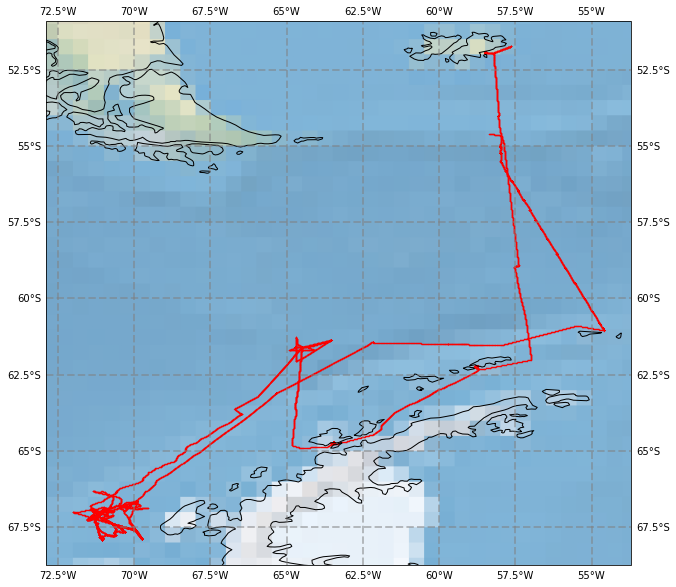

In [11]:
data.data_sel.cruise_map(ds.lon,
    ds.lat, 
    # savepath='C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\cruise_path.png'
    )

The next function give let's you select the data by geographical coordinates and time.

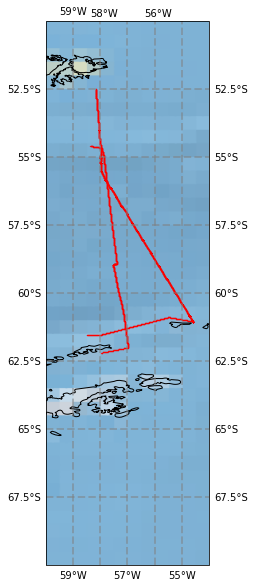

In [12]:
#I make a map with the geographical part of the cruise that I am interested in.
ds_select1_geo = data.data_sel.select_transect(ds,-58.5, -53, -62.2,-52.5)
data.data_sel.cruise_map(ds_select1_geo.lon,ds_select1_geo.lat,
    extent=[-60,-54,-70.0,-50.0],
    savepath='C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\TSG_preprocessing_return\\geo_select_path.png')

In [13]:
QC_df

,no_quality_control,good_value,probably_good_value,probably_bad_value,bad_value,changed_value,value_below_detection,value_in_excess,interpolated_value,missing_value,value_phenomenon_uncertain
position_QC,0,41189,0,0,0,0,0,0,88,0,0
depth_QC,0,41277,0,0,0,0,0,0,0,0,0
time_QC,0,41277,0,0,0,0,0,0,0,0,0
attenuation_QC,0,25051,0,174,0,0,0,0,0,0,0
conduc_QC,0,29854,0,9838,0,0,0,0,0,0,0
cloro_QC,0,25218,0,7,0,0,0,0,0,0,0
PS_uncal_QC,0,25380,0,9,0,0,0,0,0,0,0
PS_cal_QC,0,25221,0,8,0,0,0,0,0,0,0
T_hull1_QC,0,25220,0,4,0,0,0,0,0,0,0
T_hull2_QC,0,25220,0,4,0,0,0,0,0,0,0


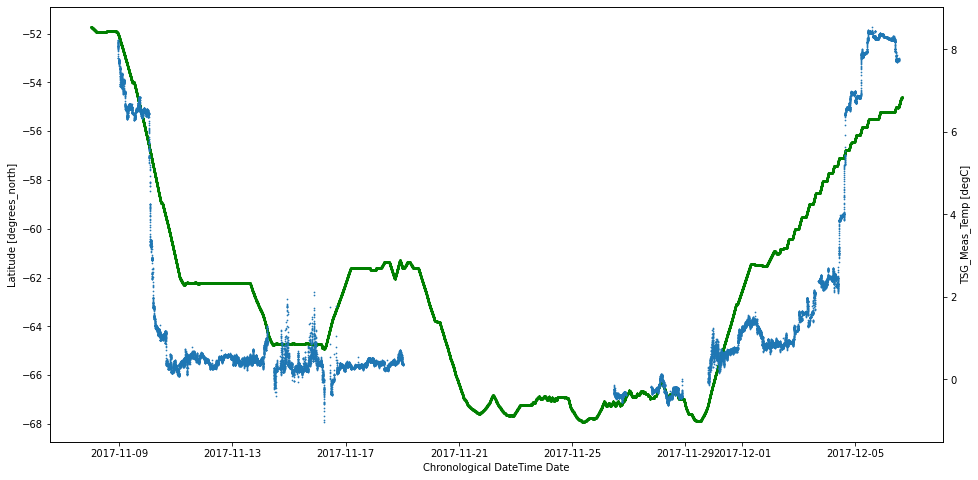

In [14]:
fig = plt.figure(figsize=(16,8))
plot = fig.add_subplot(111)
ax1 = xr.plot.scatter(ds, 'time', 'lat', s=0.5, c='green')
ax2 = plot.twinx()
xr.plot.scatter(ds, 'time', 'temp_cond_tsg', s=0.5, ax=ax2)

I am only interested in this first crossing of the Drake passage between the 9th and the 13th aprox.

In [15]:
ds_select = data.data_sel.select_transect(ds,-58.5, -56.5, -61.2,-52.5, '2017-11-25', '2017-12-31')

In [16]:
ds=ds_select

In [17]:
#Here I create a dataframe of each flag occurence for each variable. 
#Call the count_flags function for each QC variable.
position_QC = data.QC.count_flags(ds.POSITION_SEADATANET_QC)
depth_QC = data.QC.count_flags(ds.DEPTH_SEADATANET_QC)
time_QC = data.QC.count_flags(ds.TIME_SEADATANET_QC)
attenuation_QC = data.QC.count_flags(ds.ATTNDR01_SEADATANET_QC)
conduc_QC = data.QC.count_flags(ds.CNDCSG01_SEADATANET_QC)
cloro_QC = data.QC.count_flags(ds.CPHLUMTF_SEADATANET_QC)
PS_uncal_QC = data.QC.count_flags(ds.PSALSG01_SEADATANET_QC)
PS_cal_QC = data.QC.count_flags(ds.PSALSU01_SEADATANET_QC)
T_hull1_QC = data.QC.count_flags(ds.TEMPHU01_SEADATANET_QC)
T_hull2_QC = data.QC.count_flags(ds.TEMPHU02_SEADATANET_QC)
T_cond_QC = data.QC.count_flags(ds.TMESSG01_SEADATANET_QC)

#create an index
index = ['position_QC', 'depth_QC', 'time_QC', 'attenuation_QC', 'conduc_QC', 'cloro_QC', 'PS_uncal_QC', 'PS_cal_QC', 
         'T_hull1_QC', 'T_hull2_QC', 'T_cond_QC']

#Create a list with each QC variable count
QC =[position_QC, depth_QC, time_QC, attenuation_QC, conduc_QC, cloro_QC, PS_uncal_QC, PS_cal_QC, T_hull1_QC, 
    T_hull2_QC, T_cond_QC]

#Create the dataframe
QC_df = pd.DataFrame(QC, index=index)

In [18]:
QC_df

,no_quality_control,good_value,probably_good_value,probably_bad_value,bad_value,changed_value,value_below_detection,value_in_excess,interpolated_value,missing_value,value_phenomenon_uncertain
position_QC,0,3863,0,0,0,0,0,0,0,0,0
depth_QC,0,3863,0,0,0,0,0,0,0,0,0
time_QC,0,3863,0,0,0,0,0,0,0,0,0
attenuation_QC,0,3608,0,50,0,0,0,0,0,0,0
conduc_QC,0,3658,0,0,0,0,0,0,0,0,0
cloro_QC,0,3652,0,6,0,0,0,0,0,0,0
PS_uncal_QC,0,3818,0,0,0,0,0,0,0,0,0
PS_cal_QC,0,3658,0,0,0,0,0,0,0,0,0
T_hull1_QC,0,3658,0,0,0,0,0,0,0,0,0
T_hull2_QC,0,3658,0,0,0,0,0,0,0,0,0


The relevant data does not have any unwanted QC tags

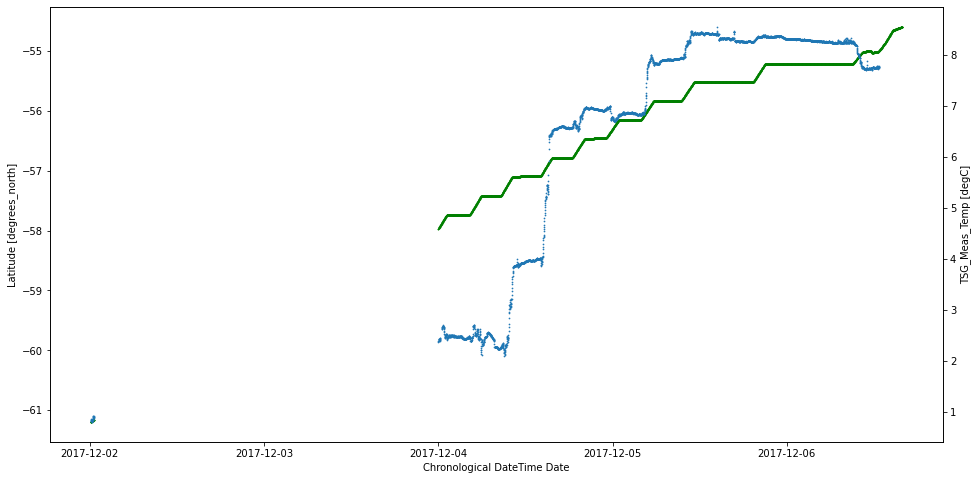

In [19]:
fig = plt.figure(figsize=(16,8))
plot = fig.add_subplot(111)
ax1 = xr.plot.scatter(ds_select, 'time', 'lat', s=0.5, c='green')
ax2 = plot.twinx()
xr.plot.scatter(ds_select, 'time', 'temp_cond_tsg', s=0.5, ax=ax2)

There are 2 days without any data. I take only the data after that

In [20]:
ds_select = data.data_sel.select_transect(ds,-58.5, -56.5, -61.2,-52.5, '2017-12-04', '2017-12-31')

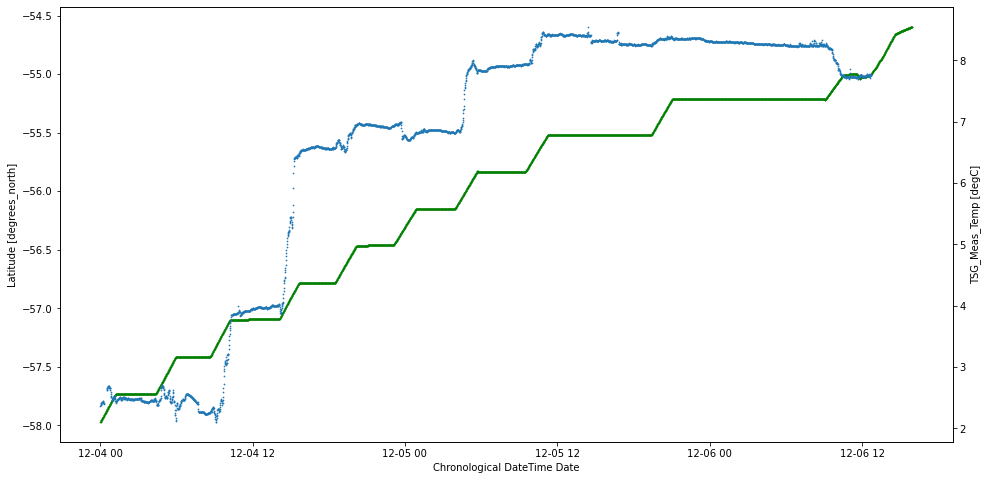

In [21]:
fig = plt.figure(figsize=(16,8))
plot = fig.add_subplot(111)
ax1 = xr.plot.scatter(ds_select, 'time', 'lat', s=0.5, c='green')
ax2 = plot.twinx()
xr.plot.scatter(ds_select, 'time', 'temp_cond_tsg', s=0.5, ax=ax2)

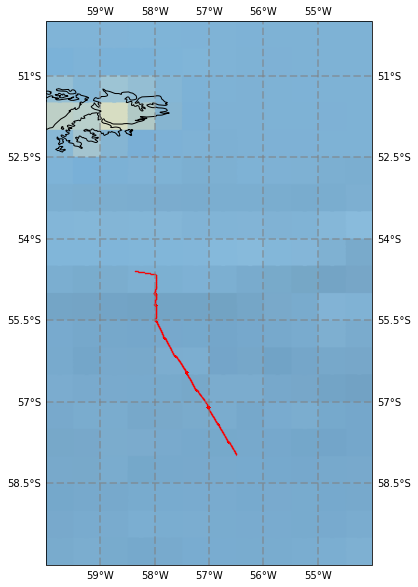

In [22]:
data.data_sel.cruise_map(ds_select.lon, ds_select.lat,extent=[-60,-54,-60.0,-50.0],savepath='C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\TSG_preprocessing_return\\cruise_select_path.png')

In [23]:
ds = ds_select

## Dealing with missing values (NaN)

In [24]:
ds

<xarray.Dataset>
Dimensions:                 (time: 3836)
Coordinates:
    lat                     (time) float64 -57.97 -57.97 -57.97 ... -54.6 -54.59
    lon                     (time) float64 -56.5 -56.5 -56.5 ... -58.36 -58.37
    depth                   (time) float32 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5
  * time                    (time) datetime64[ns] 2017-12-04T00:01:00 ... 201...
Data variables: (12/25)
    SDN_CRUISE              (time) object b'JR17001 (ORCHESTRA)' ... b'JR1700...
    crs                     (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SDN_EDMO_CODE           (time) float64 43.0 43.0 43.0 ... 43.0 43.0 43.0
    SDN_STATION             (time) object b'JR17001_PROD_SURF' ... b'JR17001_...
    SDN_LOCAL_CDI_ID        (time) object b'1903933' b'1903933' ... b'1903933'
    SDN_BOT_DEPTH           (time) float32 nan nan nan nan ... nan nan nan nan
    ...                      ...
    TEMPHU01_SEADATANET_QC  (time) float32 49.0 49.0 49.0 49.0 ... nan nan nan
    temp_hull_1             (time) float32 1.41 1.426 1.452 ... nan nan nan
    TEMPHU02_SEADATANET_QC  (time) float32 49.0 49.0 49.0 49.0 ... nan nan nan
    temp_hull_2             (time) float32 1.412 1.429 1.455 ... nan nan nan
    TMESSG01_SEADATANET_QC  (time) float32 49.0 49.0 49.0 49.0 ... nan nan nan
    temp_cond_tsg           (time) float32 2.365 2.383 2.383 ... nan nan nan
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [25]:
ds.temp_cond_tsg.isnull().sum()

<xarray.DataArray 'temp_cond_tsg' ()>
array(205)

In [26]:
cond_tsg_nan = int(ds.conductivity_tsg.isnull().sum())
sal_tsg_cal_nan = int(ds.sal_tsg_cal.isnull().sum())
sal_tsg_nocal_nan = int(ds.sal_tsg_nocal.isnull().sum())
temp_hull_1_nan = int(ds.temp_hull_1.isnull().sum())
temp_hull_2_nan = int(ds.temp_hull_2.isnull().sum())
temp_cond_tsg_nan = int(ds.temp_cond_tsg.isnull().sum())

ds_nan_dict = {'cond_tsg_nan':cond_tsg_nan, 'sal_tsg_cal_nan':sal_tsg_cal_nan, 'sal_tsg_nocal_nan':sal_tsg_nocal_nan, 
               'temp_hull_1_nan':temp_hull_1_nan, 'temp_hull_2_nan':temp_hull_2_nan, 'temp_cond_tsg_nan':temp_cond_tsg_nan}

ds_nan_values = list(ds_nan_dict.values())

index = list(ds_nan_dict.keys())

In [27]:
pd.DataFrame(ds_nan_values,index=index,columns=['Number of NaN values'])

,Number of NaN values
cond_tsg_nan,205
sal_tsg_cal_nan,45
sal_tsg_nocal_nan,205
temp_hull_1_nan,205
temp_hull_2_nan,205
temp_cond_tsg_nan,205


Let´s try and have a look were the missing values are.

In [28]:
ds

<xarray.Dataset>
Dimensions:                 (time: 3836)
Coordinates:
    lat                     (time) float64 -57.97 -57.97 -57.97 ... -54.6 -54.59
    lon                     (time) float64 -56.5 -56.5 -56.5 ... -58.36 -58.37
    depth                   (time) float32 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5
  * time                    (time) datetime64[ns] 2017-12-04T00:01:00 ... 201...
Data variables: (12/25)
    SDN_CRUISE              (time) object b'JR17001 (ORCHESTRA)' ... b'JR1700...
    crs                     (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SDN_EDMO_CODE           (time) float64 43.0 43.0 43.0 ... 43.0 43.0 43.0
    SDN_STATION             (time) object b'JR17001_PROD_SURF' ... b'JR17001_...
    SDN_LOCAL_CDI_ID        (time) object b'1903933' b'1903933' ... b'1903933'
    SDN_BOT_DEPTH           (time) float32 nan nan nan nan ... nan nan nan nan
    ...                      ...
    TEMPHU01_SEADATANET_QC  (time) float32 49.0 49.0 49.0 49.0 ... nan nan nan
    temp_hull_1             (time) float32 1.41 1.426 1.452 ... nan nan nan
    TEMPHU02_SEADATANET_QC  (time) float32 49.0 49.0 49.0 49.0 ... nan nan nan
    temp_hull_2             (time) float32 1.412 1.429 1.455 ... nan nan nan
    TMESSG01_SEADATANET_QC  (time) float32 49.0 49.0 49.0 49.0 ... nan nan nan
    temp_cond_tsg           (time) float32 2.365 2.383 2.383 ... nan nan nan
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

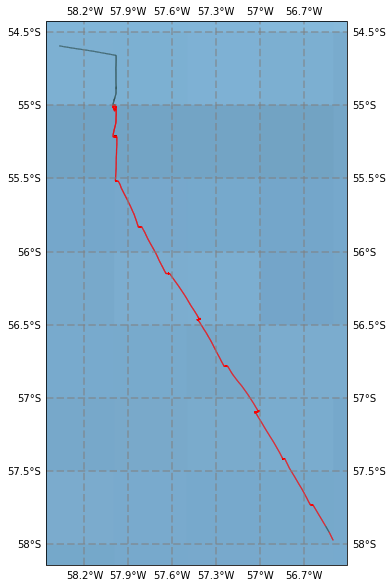

In [29]:
data.QC.cruise_map_QC(ds.TMESSG01_SEADATANET_QC.fillna(57),
    ds.lon, 
    ds.lat,
    #extent=[-58.5, -55.5, -61.2,-52.5]
    #savepath='C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\map_bad_values.png'
    ) 

We can try just excluding the data, it is not that much. The data north of 55°S will be just missing, and in the little piece in the South has to be check on. 

update: exluding the data before the gap in the South. It is a 5000m gap. For that we have to create an aux distance

In [30]:
ds = ds.where(ds.temp_cond_tsg.fillna(-999) != -999, drop=True) #here all nans are thrown out

In [32]:
#Let's calculate the distances
distance = gsw.distance(np.array(ds.lon), np.array(ds.lat))


#And the cumulative distance
distance_cum = np.insert(np.cumsum(distance), 0, 0)

ds['distance_cum'] = xr.DataArray(distance_cum,dims={'time':ds.time},coords={'time':ds.time})

In [33]:
distance_aux = np.insert(distance, 0, 999) #CAREFUL: if I was to introduce a Nan instead of 999 we would introduce a Nan value in all the variables.
ds['distance_aux'] = xr.DataArray(distance_aux,dims={'time':ds.time},coords={'time':ds.time})
ds['distance_aux'].attrs = {
    'long_name': 'Auxiliary distances',
    'standard_name': 'distance_aux',
    'units': 'm',
    'description': 'Auxiliary variable composed of the distances between datapoint with an additional point inserted as the first value, being 999. This is in order to be able to sample out of the dataset acording to the distance. That way, e.g., if one wanted to sample all values with a distance greater than 200m, the reaching point of each distance sample would be excluded.'
}

In [34]:
ds.where(ds.distance_aux > 5000, drop=True).time #from here we know the time, so select data by the value just after this time. 

<xarray.DataArray 'time' (time: 1)>
array(['2017-12-04T00:30:00.000064000'], dtype='datetime64[ns]')
Coordinates:
    lat      (time) float64 -57.87
    lon      (time) float64 -56.55
    depth    (time) float32 6.5
  * time     (time) datetime64[ns] 2017-12-04T00:30:00.000064
Attributes:
    long_name:            Chronological DateTime Date
    standard_name:        time
    ancillary_variables:  TIME_SEADATANET_QC
    axis:                 T
    valid_min:            0.0
    valid_max:            2500000.0
    sdn_parameter_urn:    SDN:P01::CJDY1101
    sdn_parameter_name:   DateTime (chronological)
    sdn_uom_name:         Days
    sdn_uom_urn:          SDN:P06::UTAA

In [36]:
data.data_sel.select_transect?

Signature:
data.data_sel.select_transect(
    ds,
    min_lon,
    max_lon,
    min_lat,
    max_lat,
    min_time='1990-01-01',
    max_time='2100-12-31',
    greater_equal_min_time=True,
    greater_equal_max_time=True,
)
Docstring:
Selects the data by latitude, longitude and time.
Args:
    ds(xr.dataset): the xarray dataset.
    min_lon(float): minimum longitude from -180° to 180°.
    max_lon(float): maximum longitude from -180° to 180°.
    min_lat(float): minimum latitude from -90° to 90°.
    max_lat(float): maximum latitude from -90° to 90°.
    min_time(str): starting time in datetime64. Format:'year-month-day'. Default is 1990-01-01.
    max_time(str): ending time in datetime64. Format:'year-month-day'. Defult is 2100-12-31.
    
File:      c:\users\gian_\repos\mthesis_gianlucca\src\gg_mthesis\d01_data\data_sel.py
Type:      function


In [37]:
#Let´s select the definite data (without gaps)

ds_select = data.data_sel.select_transect(ds,-58.5, -56.5, -61.2,-52.5, '2017-12-04T00:30:00.000064', '2017-12-31', greater_equal_min_time=False)

In [39]:
ds_select

<xarray.Dataset>
Dimensions:                 (time: 3613)
Coordinates:
    lat                     (time) float64 -57.87 -57.87 -57.86 ... -55.0 -55.0
    lon                     (time) float64 -56.55 -56.56 -56.56 ... -58.01 -58.0
    depth                   (time) float32 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5
  * time                    (time) datetime64[ns] 2017-12-04T00:31:00.000064 ...
Data variables: (12/27)
    SDN_CRUISE              (time) object b'JR17001 (ORCHESTRA)' ... b'JR1700...
    crs                     (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SDN_EDMO_CODE           (time) float64 43.0 43.0 43.0 ... 43.0 43.0 43.0
    SDN_STATION             (time) object b'JR17001_PROD_SURF' ... b'JR17001_...
    SDN_LOCAL_CDI_ID        (time) object b'1903933' b'1903933' ... b'1903933'
    SDN_BOT_DEPTH           (time) float32 nan nan nan nan ... nan nan nan nan
    ...                      ...
    TEMPHU02_SEADATANET_QC  (time) float32 49.0 49.0 49.0 ... 49.0 49.0 49.0
    temp_hull_2             (time) float32 1.706 1.71 1.722 ... 7.114 7.103
    TMESSG01_SEADATANET_QC  (time) float32 49.0 49.0 49.0 ... 49.0 49.0 49.0
    temp_cond_tsg           (time) float32 2.626 2.639 2.651 ... 7.766 7.78
    distance_cum            (time) float64 1.165e+04 1.204e+04 ... 3.712e+05
    distance_aux            (time) float64 389.8 391.0 392.7 ... 192.8 193.5
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [47]:
np.max(np.array(ds_select.distance_aux))

409.6977582723749

In [48]:
print('Min(distance): ' + str(np.min(np.array(ds_select.distance_aux))))
print('Max(distance): ' + str(np.max(np.array(ds_select.distance_aux))))
print('Mean(distance): ' + str(np.mean(np.array(ds_select.distance_aux))))
print('Median(distance): ' + str(np.median(np.array(ds_select.distance_aux))))

Min(distance): 0.0
Max(distance): 409.6977582723749
Mean(distance): 99.61863624945862
Median(distance): 4.433271912889526


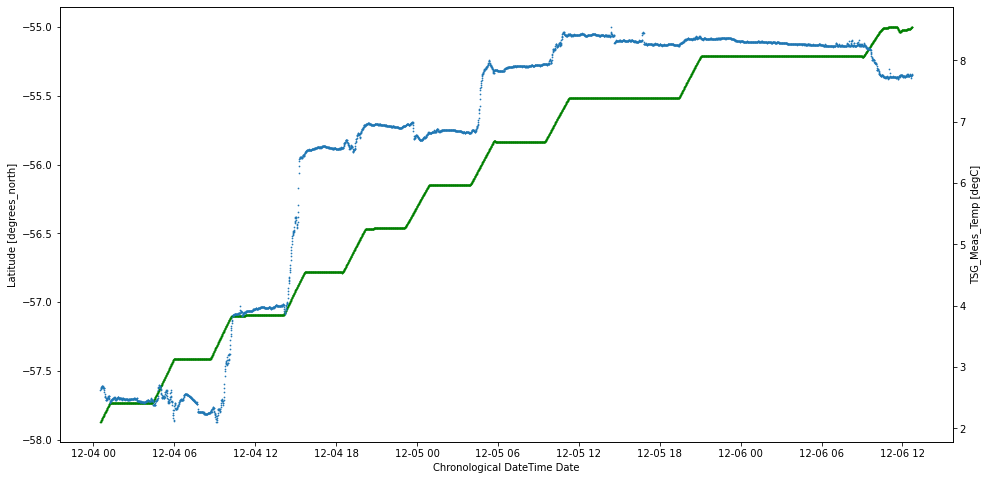

In [49]:
fig = plt.figure(figsize=(16,8))
plot = fig.add_subplot(111)
ax1 = xr.plot.scatter(ds_select, 'time', 'lat', s=0.5, c='green')
ax2 = plot.twinx()
xr.plot.scatter(ds_select, 'time', 'temp_cond_tsg', s=0.5, ax=ax2)


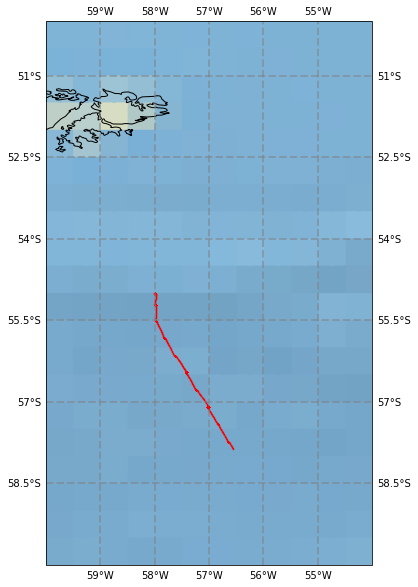

In [51]:
data.data_sel.cruise_map(ds_select.lon, ds_select.lat,extent=[-60,-54,-60.0,-50.0])

The data stored in the dataset now is preprocessed and be used for first analyses. The next processing goal is gridding the data to a equally spaced transect. For that the spatial (and temporal) resolution has to be looked into first.

In [54]:
ds = ds_select

## Spatial resolution and excluding of some data (from fun_with_boat_speed.ipynb)

Here we are going to have a look into the distances between datapoints. This way we can exclude clustered up points (when the boat was moving slowly or standing still) or far away points (boat was moving really fast). Similar procedure as Drushka et al. (2019)

In [61]:
#Let's calculate the distances
distance = gsw.distance(np.array(ds.lon), np.array(ds.lat))
distance_cum = np.insert(np.cumsum(distance), 0, 0)
ds['distance_cum'] = xr.DataArray(distance_cum,dims={'time':ds.time},coords={'time':ds.time})
ds = ds.set_coords('distance_cum')
ds['distance_cum'].attrs = {
    'long_name': 'Cumulative distance',
    'standard_name': 'distance_cum',
    'units': 'm',
    'description': 'cumulative distance between sampling points calculated using gsw'
}

In [67]:
ds

<xarray.Dataset>
Dimensions:                 (time: 3613)
Coordinates:
    distance_cum            (time) float64 0.0 391.0 ... 3.593e+05 3.595e+05
    lat                     (time) float64 -57.87 -57.87 -57.86 ... -55.0 -55.0
    lon                     (time) float64 -56.55 -56.56 -56.56 ... -58.01 -58.0
    depth                   (time) float32 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5
  * time                    (time) datetime64[ns] 2017-12-04T00:31:00.000064 ...
Data variables: (12/26)
    SDN_CRUISE              (time) object b'JR17001 (ORCHESTRA)' ... b'JR1700...
    crs                     (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SDN_EDMO_CODE           (time) float64 43.0 43.0 43.0 ... 43.0 43.0 43.0
    SDN_STATION             (time) object b'JR17001_PROD_SURF' ... b'JR17001_...
    SDN_LOCAL_CDI_ID        (time) object b'1903933' b'1903933' ... b'1903933'
    SDN_BOT_DEPTH           (time) float32 nan nan nan nan ... nan nan nan nan
    ...                      ...
    temp_hull_1             (time) float32 1.703 1.707 1.719 ... 7.096 7.09
    TEMPHU02_SEADATANET_QC  (time) float32 49.0 49.0 49.0 ... 49.0 49.0 49.0
    temp_hull_2             (time) float32 1.706 1.71 1.722 ... 7.114 7.103
    TMESSG01_SEADATANET_QC  (time) float32 49.0 49.0 49.0 ... 49.0 49.0 49.0
    temp_cond_tsg           (time) float32 2.626 2.639 2.651 ... 7.766 7.78
    distance_aux            (time) float64 389.8 391.0 392.7 ... 192.8 193.5
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [63]:
#Let's calculate each timestep (which should be 1 min)
time_diff = []
for time in range(len(ds.time)-1):
    time_diff.append(np.array((ds.time[time+1]) - np.array(ds.time[time]))/np.timedelta64(1, 's'))
time_diff = xr.DataArray(time_diff,dims={'distance':distance},coords={'distance':distance})

#Now we can calculate the vessel speed
vel = time_diff.distance/time_diff*3.6

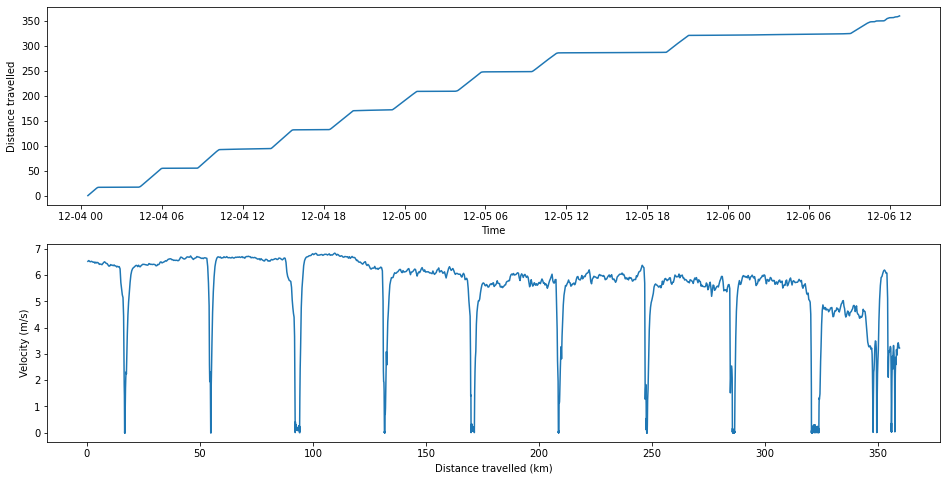

In [64]:
#Let's plot what we have got so far

fig, (ax0, ax1) = plt.subplots(nrows=2,figsize=(16,8))
sns.lineplot(y=ds.distance_cum/1000, x=ds.time, ax=ax0)

sns.lineplot(x=distance_cum[1:]/1000,y=vel/3.6, ax=ax1)

ax0.set(xlabel='Time', ylabel='Distance travelled')
ax1.set(xlabel='Distance travelled (km)', ylabel='Velocity (m/s)')

plt.savefig('C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\TSG_preprocessing_return\\vessel_speed.png', bbox_inches='tight', format='png')

Several stops for the CTD casts. 

In [68]:
#I am going to exclude all the data where the distance is less than 240 m (explanation in fun_with_boat_speed notebook).
#Let's calculate the cumulative distance between sampling points (starting at 0) and introduce it as a coordinate variable in the dataset

In [69]:
vel

<xarray.DataArray (distance: 3612)>
array([23.45712468, 23.5619213 , 23.43748316, ..., 12.01563699,
       11.57132454, 11.60751352])
Coordinates:
  * distance  (distance) float64 391.0 392.7 390.6 390.0 ... 200.3 192.8 193.5

In [77]:
#ds[np.logical_and(ds['distance_aux'] >= 240, ds['distance_aux'] <= 240)] code example for multiple conditions

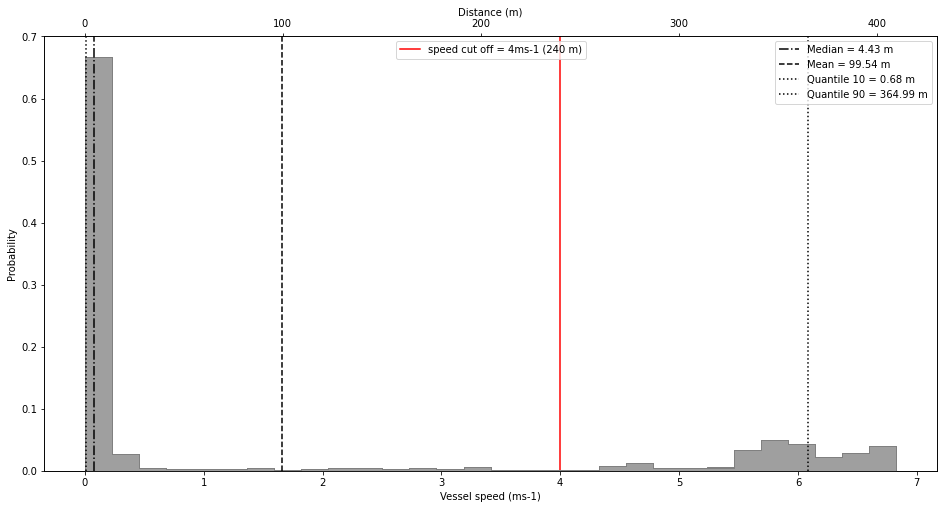

In [87]:
#Let's plot the distances and vessel speed in a histogram, with a cut-off line at 4ms-1

fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(16,8))
ax1 = ax0.twiny()

sns.histplot(vel/3.6, element='step', stat='probability', color='grey', alpha = 0.5, ax=ax0, bins=30)
sns.histplot(vel.distance, element='step', stat='probability', color='grey', alpha =0.5, ax=ax1, bins=30)

ax1.axvline(x=np.median(distance), label=str(('Median = ') + str(round(np.median(distance),2)) 
    + str(' m')), color='black', linestyle='-.')
ax1.axvline(x=np.mean(distance), label=str(('Mean = ') + str(round(np.mean(distance),2)) 
    + str(' m')), color='black', linestyle='--')
ax1.axvline(x=np.quantile(distance, .10), label=str(('Quantile 10 = ') + str(round(np.quantile(distance, .10),2)) 
    + str(' m')), color='black', linestyle=':',)
ax1.axvline(x=np.quantile(distance, .90), label=str(('Quantile 90 = ') + str(round(np.quantile(distance, .90),2)) 
    + str(' m')), color='black', linestyle=':')
ax1.legend(loc='upper right')

ax0.axvline(x=4, label='speed cut off = 4ms-1 (240 m)', color='red', linestyle='-')

#ax1.set_xticks(np.arange(0, 460, 60))

ax0.set(xlabel='Vessel speed (ms-1)')
ax1.set(xlabel='Distance (m)')

ax0.legend(loc='upper center')

plt.savefig('C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\TSG_preprocessing_return\\vessel_speed_hist.png', bbox_inches='tight', format='png')

In [75]:
# Selecting the proper data
ds = ds.where(ds.distance_aux >= 240, drop=True)

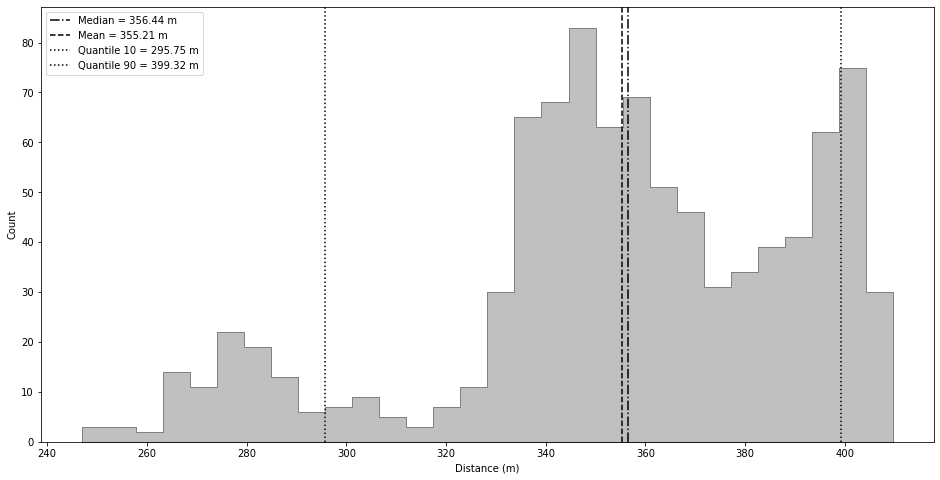

In [93]:
#Let's plot the distances and vessel speed in a histogram, with a cut-off line at 4ms-1

fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(16,8))

#sns.histplot(vel/3.6, element='step', stat='probability', color='grey', alpha = 0.5, ax=ax0)
sns.histplot(ds.distance_aux, element='step', stat='count', color='grey', alpha =0.5, ax=ax0, bins=30)

ax0.set(xlabel='Distance (m)')

ax0.axvline(x=np.median(np.array(ds.distance_aux)), label=str(('Median = ') + str(round(np.median(np.array(ds.distance_aux)),2)) 
    + str(' m')), color='black', linestyle='-.')
ax0.axvline(x=np.mean(np.array(ds.distance_aux)), label=str(('Mean = ') + str(round(np.mean(np.array(ds.distance_aux)),2)) 
    + str(' m')), color='black', linestyle='--')
ax0.axvline(x=np.quantile(np.array(ds.distance_aux), .10), label=str(('Quantile 10 = ') + str(round(np.quantile(np.array(ds.distance_aux), .10),2)) 
    + str(' m')), color='black', linestyle=':',)
ax0.axvline(x=np.quantile(np.array(ds.distance_aux), .90), label=str(('Quantile 90 = ') + str(round(np.quantile(np.array(ds.distance_aux), .90),2)) 
    + str(' m')), color='black', linestyle=':')
ax0.legend(loc='upper left')

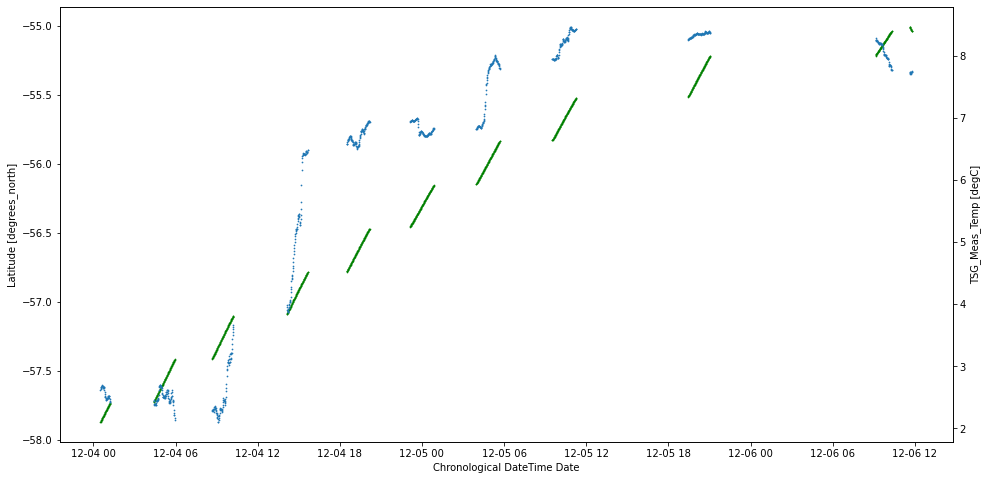

In [94]:
fig = plt.figure(figsize=(16,8))
plot = fig.add_subplot(111)
ax1 = xr.plot.scatter(ds, 'time', 'lat', s=0.5, c='green')
ax2 = plot.twinx()
xr.plot.scatter(ds, 'time', 'temp_cond_tsg', s=0.5, ax=ax2)

In [95]:
# USE THIS DATA WITH CAUTION, CHECK WITH MARCEL

## Density calculation

In [96]:
#I am going to work with temperature (and we have decided to use the TSG temperature) and salinity (calibrated). I am going to drop of the variables I do not need. I also rename salinity and temperature.
#POT_TEMP --> LOOK AT WORKING NOTES
ds = ds.drop(['attenuation','conductivity_tsg','chl-a','sal_tsg_nocal','temp_hull_1','temp_hull_2']).rename({'sal_tsg_cal':'SP', 'temp_cond_tsg':'T'})

In [97]:
#I am going to check the influence of pressure on the data:
#Let's obtain the pressure, absolute salinity and conservative temperature. (As the water is pumped on-board the pressure is released)
ds['pressure'] = gsw.p_from_z(-ds.depth, ds.lat)
ds['SA'] = gsw.SA_from_SP(ds.SP, 0, ds.lon, ds.lat)
ds['CT'] = gsw.CT_from_t(ds.SA, ds.T, 0)

#Attributes for the variable
ds['pressure'].attrs = {
    'long_name': 'Pressure',
    'standard_name': 'press',
    'units': 'dbar',
    'description': 'Sea pressure from height using gsw.'}

ds['SA'].attrs = {
    'long_name': 'Absolute Salinity',
    'standard_name': 'CT',
    'units': 'g/kg',
    'description': 'Absolute salinity from practical salinity using gsw.'}

ds['CT'].attrs = {
    'long_name': 'Conservative Temperture',
    'standard_name': 'CT',
    'units': '°C',
    'description': 'Conservative temperature from potential temperature using gsw.'}

In [98]:
#Going to check something out. The operating pressure is 34.5 dbar max, let's say 30dbar. That means an approximate depth of 30m. Let's calculate the CT with this depth. 

In [99]:
CT_30 = gsw.CT_from_t(ds.SA, ds.T, 30)

[Text(0.5, 0, 'Distance travelled (km)'),
 Text(0, 0.5, 'Temperature difference (°C)')]

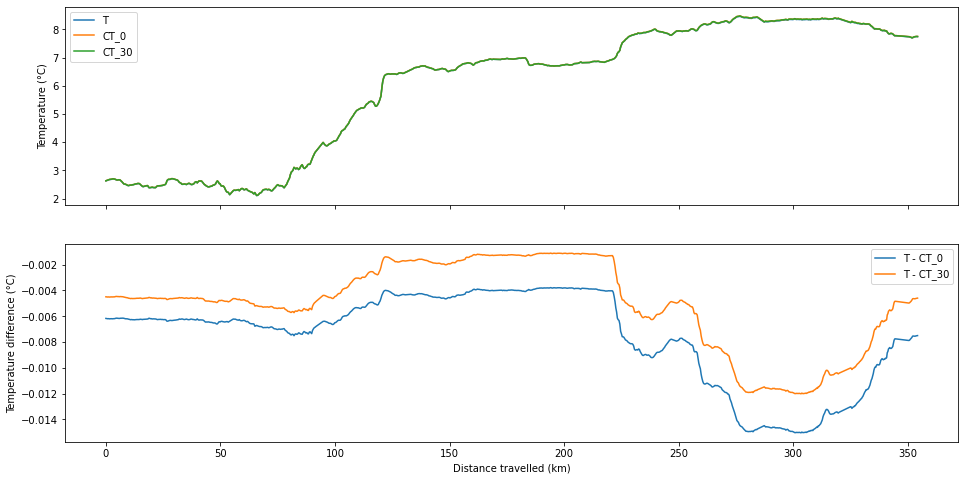

In [100]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(16,8), sharex=True)

sns.lineplot(x=ds.distance_cum/1000, y=ds.T, label='T', ax=ax0)
sns.lineplot(x=ds.distance_cum/1000, y=ds.CT, label='CT_0', ax=ax0)
sns.lineplot(x=ds.distance_cum/1000, y=CT_30, label='CT_30', ax=ax0)

sns.lineplot(x=ds.distance_cum/1000, y=ds.T-ds.CT, label='T - CT_0', ax=ax1)
sns.lineplot(x=ds.distance_cum/1000, y=ds.T-CT_30, label='T - CT_30', ax=ax1)

ax0.legend()
ax0.set(xlabel='Distance travelled (km)', ylabel='Temperature (°C)')
ax1.set(xlabel='Distance travelled (km)', ylabel='Temperature difference (°C)')

In [101]:
#From here we can calculate the density. As the water is pumped to the surface it is moved adiabatically, so it actually is the the potential temperature
#Because the differences in conservative temperature of the pressure build of inside of the system is low, for now I will consider a zero depth.
ds['rho_pot'] = gsw.rho(ds.SA, ds.CT, 0)

ds['rho_pot'].attrs = {
    'long_name': 'Potential density',
    'standard_name': 'rho_pot',
    'units': 'kg m-3',
    'description': 'Potential density calculated from SA and CT at 0 pressure using gsw.'}

In [109]:
ds

<xarray.Dataset>
Dimensions:                 (time: 922)
Coordinates:
    distance_cum            (time) float64 0.0 391.0 ... 3.54e+05 3.543e+05
    lat                     (time) float64 -57.87 -57.87 ... -55.04 -55.04
    lon                     (time) float64 -56.55 -56.56 -56.56 ... -58.0 -57.99
    depth                   (time) float32 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5
  * time                    (time) datetime64[ns] 2017-12-04T00:31:00.000064 ...
Data variables: (12/24)
    SDN_CRUISE              (time) object b'JR17001 (ORCHESTRA)' ... b'JR1700...
    crs                     (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SDN_EDMO_CODE           (time) float64 43.0 43.0 43.0 ... 43.0 43.0 43.0
    SDN_STATION             (time) object b'JR17001_PROD_SURF' ... b'JR17001_...
    SDN_LOCAL_CDI_ID        (time) object b'1903933' b'1903933' ... b'1903933'
    SDN_BOT_DEPTH           (time) float32 nan nan nan nan ... nan nan nan nan
    ...                      ...
    T                       (time) float32 2.626 2.639 2.651 ... 7.747 7.745
    distance_aux            (time) float64 389.8 391.0 392.7 ... 364.2 306.1
    pressure                (time) float64 6.561 6.561 6.561 ... 6.559 6.559
    SA                      (time) float64 33.98 33.97 33.97 ... 34.1 34.1 34.1
    CT                      (time) float64 2.632 2.645 2.657 ... 7.755 7.752
    rho_pot                 (time) float64 1.027e+03 1.027e+03 ... 1.026e+03
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

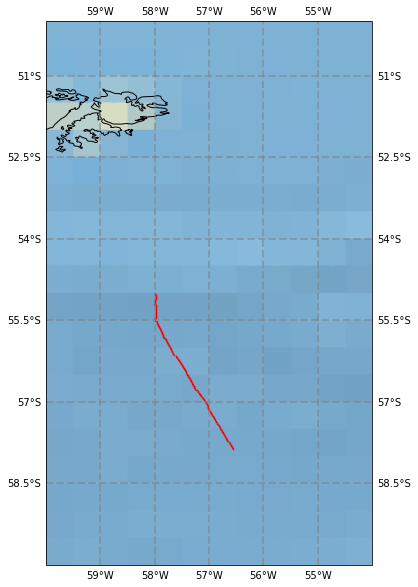

In [113]:
data.data_sel.cruise_map(ds.lon, ds.lat,extent=[-60,-54,-60.0,-50.0])

In [112]:
#This dataset has been reshaped, selected, QC and SA, CT and density has been calculated. It now can be saved as the preprocessing step.
#The next processing step is going to be gridding the data.
path_to = '.\\data\\02_intermediate\\tsg_orchestra_return\\b1903933_preprocessed_return.nc'
#ds.to_netcdf(path_to)